#  Titanic Survival Prediction

## Problem Statement
The titanic project is based on the scenario of the actual titanic ship that took passengers for a sea trip, and never returned back. 
This proejct focuses on predicting the passenger survival based on the different features available in the dataset. We will be performing the following steps to train and test our model for this project.

- 1. Collecting the data
- 2. Importing the dataset files from S3
- 3. Exploratory data analysis
- 4. Data Cleaning
- 5. Training the Model 
- 6. Deploying the Model
- 7. Surival Prediction
- 8. Delete Endpoints

## 1. Collecting the Data for Titanic Dataset

The dataset for Titanic Example can be found at https://www.kaggle.com/c/titanic/data
Goto the link and click on Download All, A titanic.zip file will be download. Unzip the file contents
and then you will see three .csv files. Here we are using only train.csv file.

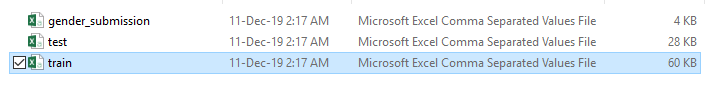
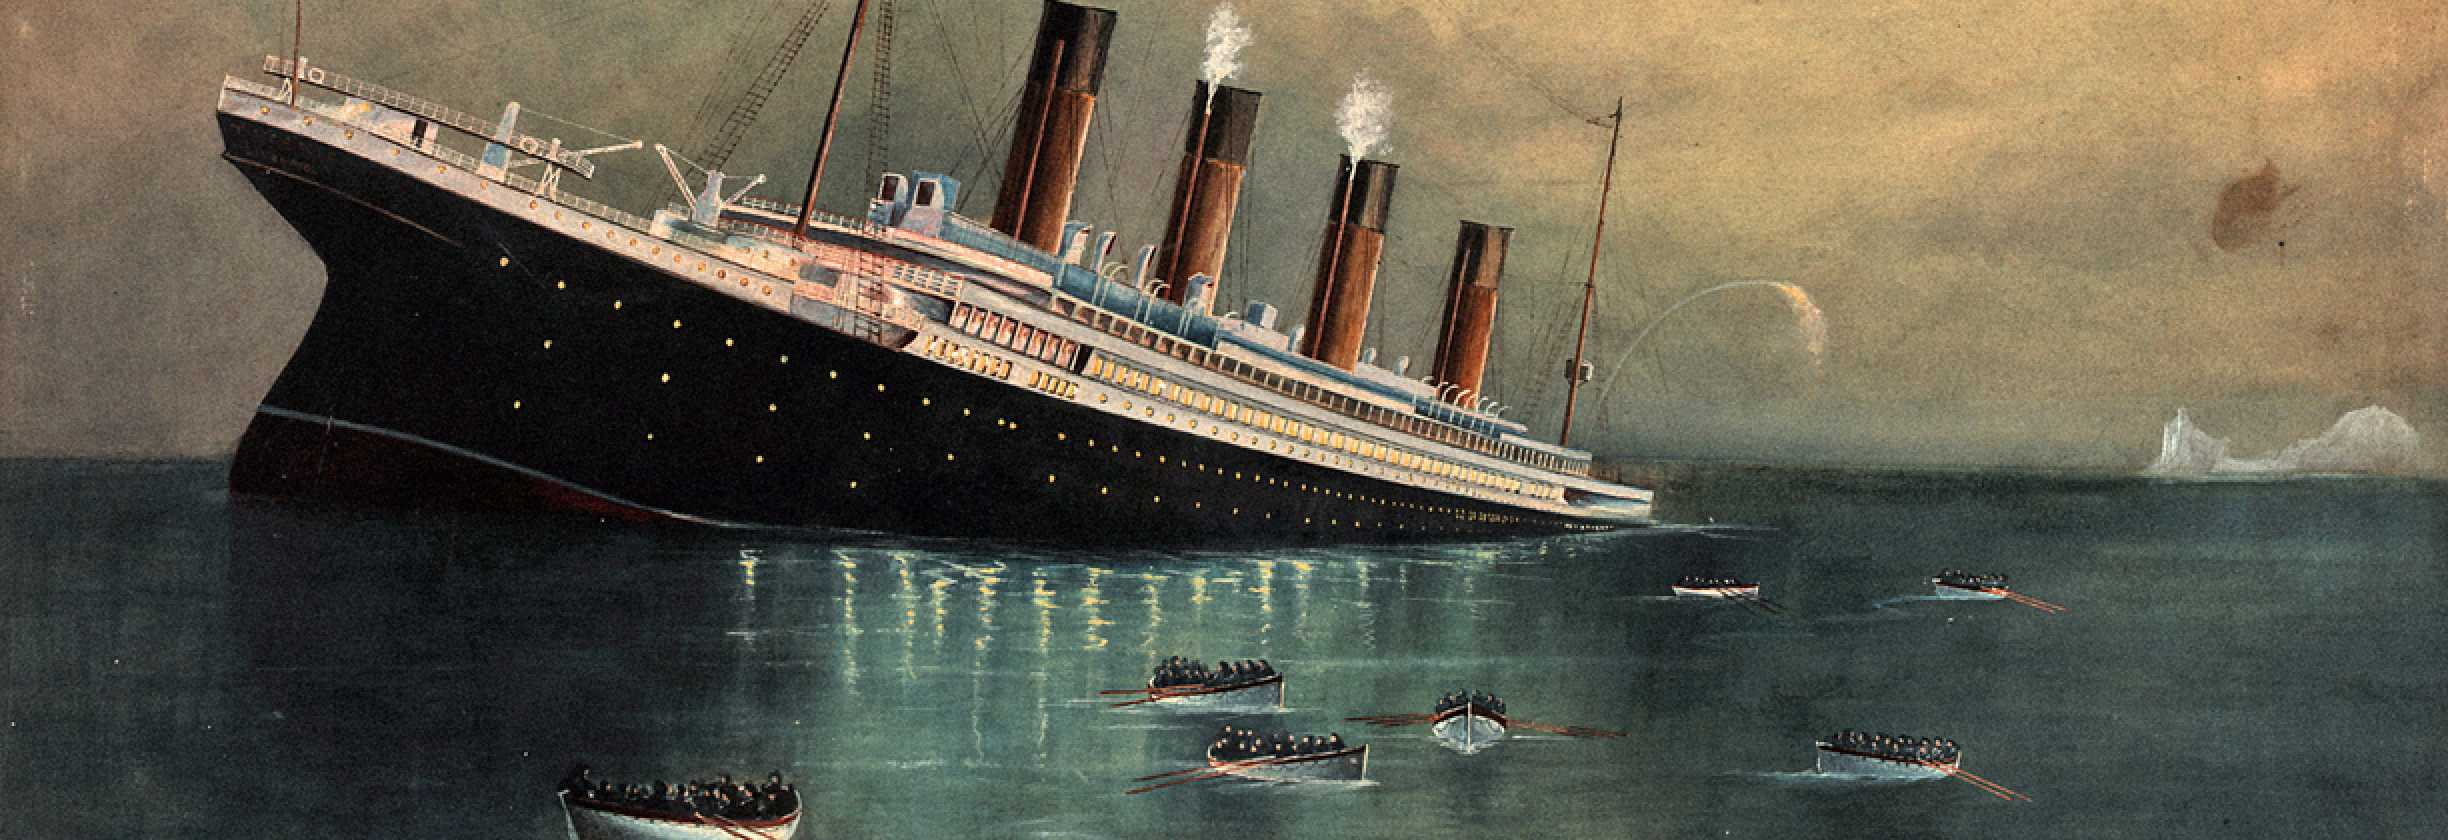


## Importing the necessary libraries
Importing the necessary libraries to run the project.

#### Pandas

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It has a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.

In [1]:
import pandas as pd

#### Pylab
It is a "magic function" that can be called in Ipython. By calling it the interpreter will import the **matplotlib** and **NumPy** modules in a way that we have access to all their functions.

In [2]:
import matplotlib.pyplot as plt

#This will plot our figures during Data Analysis Inline (Single Row)
%pylab inline 
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


## 2. Importing the Dataset to Jupyter Notebook

So we have our dataset already saved in the S3 bucket as seen previously, now we will import it and bring in to the Jupyter Notebook for further processing.

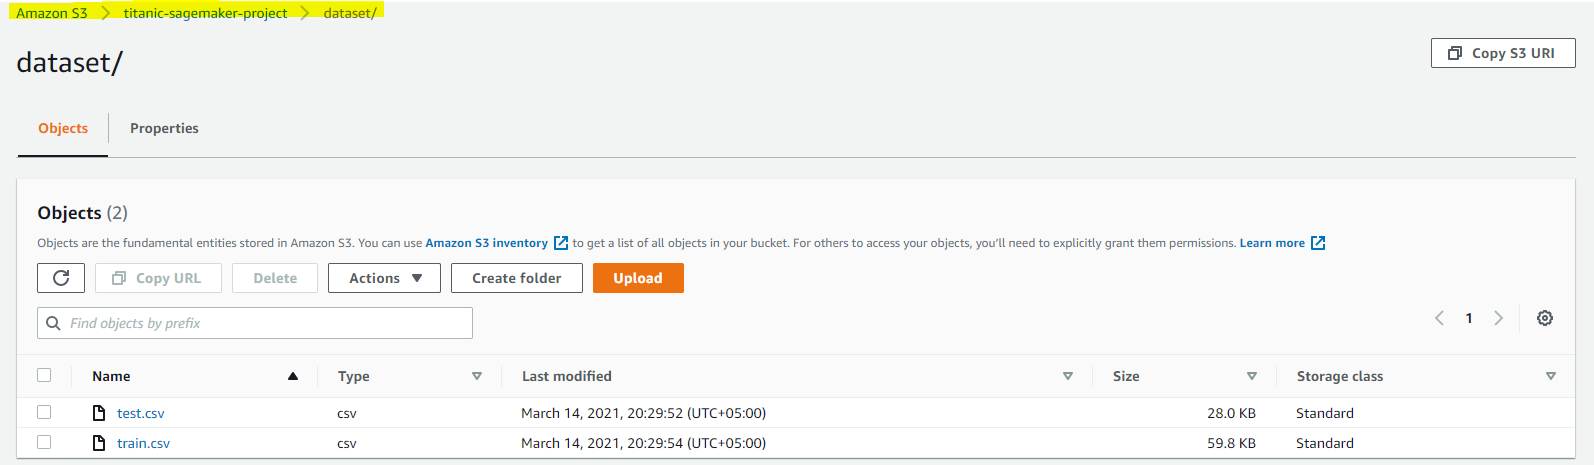

### Read/Import the .csv File
Now we will see how we can read the **train.csv** file in our notebook from the S3 storage.

In [3]:
bucket="titanic-aws-sagemaker-project/dataset"
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_csv(data_location) #df

In [4]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

As can be seen above, we have the dataset contained within the train.csv file, there are 891 rows of data with 12 columns. What does they show and what they represent? Lets check it out. 

## 3. Exploratory Data Analysis
Now this is the important part of any dataset where we look at what the data represents, what information it contains.

**Data Frame Information for total values and Data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistical Description of the Dataset**

In [6]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Now that our data is imported, all our data is stored in the variable **df**.

**Shape of Data**


To check for how many rows and columns the data contain.

In [7]:
df.shape

(891, 12)

If we want to see the end rows of the data set we use the tail() function.

In [8]:
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

Now we want to see what does the top rows data contain, here we use the function head()

In [9]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Data Analysis


We see that there are **12 Columns** in our dataset, each of them giving some useful information. We can also say that these 12 column shows different features of the data. 

**Passenger ID:** This is the passenger number for each of them in our data set starting from 1 to 891

**Survived:** This column represents the information for the survival of passenger(s). 
Where 0 = Not Survived/Dead , 1= Survived/Alive

**Pclass:** This is the passenger(s) ticket class.
Where 1 = 1st, 2 = 2nd and 3 = 3rd.

**Sex:** This contains the gender of the passenger

**Age:** These are the age numbers of each passenger(s).

**SibSp:** This value represents for any sibling or spouse of the passenger if present, in which the number shows the total count for the same.

**Parch:** This value represents for any Parent(s) or children(s) of the passenger if present, in which the number shows the total count for the same.

**Ticket:** This is the ticket number for each passenger(s).

**Fare:** This is the fare amount value that each passenger(s) have paid to board.

**Cabin:** Cabin number for each passenger(s).

**Embark:** This shows where the passenger(s) was embarked from (port of boarding) 
Where C = Cherbourg, Q = Queenshow, S = Southampton.



### Data Exploration
Let's now explore different features of the availalbe dataset. 

**Feature(s) Data Types**

In [10]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Number of Survived Passengers**

In [11]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Gender Wise Count**

In [12]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Visual Data Exploration

**Histogram for Male and Female Count**

<AxesSubplot:>

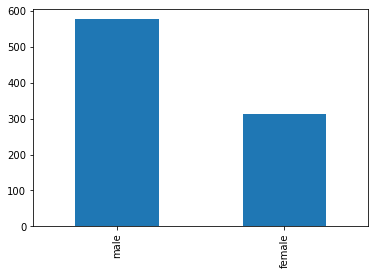

In [13]:
df.Sex.value_counts().plot(kind = 'bar')

**Fare Histogram**

<AxesSubplot:>

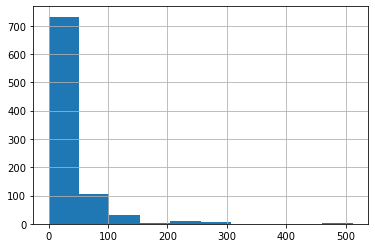

In [14]:
df.Fare.hist()

----------------------------------------------------------------------------------------------------------------------------
## 4. Data Cleaning

a) Extracting the Name Titles (Mr, Mrs etc) from the Name feature field

b) Changing the Gender (Sex) to numeric values

c) Filling in the missing information

d) Seperating/Categorizing the uncategorized data in the dataset

### Pre-Processing Data Analysis for Data Cleaning
Before we start the data cleaning part (steps a to e) of our data. We first look at an insight of the complete data in light with the cleaning we need to do with it. 

**Python Visualization Library Importing**

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

**Bar Chart Plots for Categorical Features**

PClass | Sex | SibSp | Parch | Embarked | Cabin

In [16]:
df_copy = df
#Defining a function with name bar_chart 
def bar_chart(feature):
    survived = df_copy[df_copy['Survived']==1][feature].value_counts()
    dead = df_copy[df_copy['Survived']==0][feature].value_counts()
    df_new = pd.DataFrame([survived,dead])
    df_new.index = ['Survived','Dead']
    df_new.plot(kind='bar',stacked=True, figsize=(10,5))
    #df_new.plot(kind='bar',stacked=False, figsize=(10,5))

**Gender Based Survival**

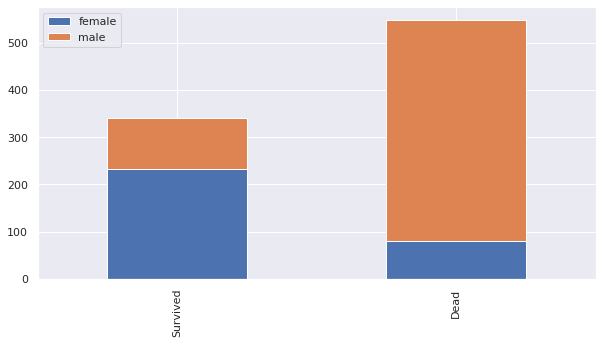

In [17]:
bar_chart('Sex')

The above bar chart shows that the **Women** are more likely survived than **Men**

**Pclass based Survival**

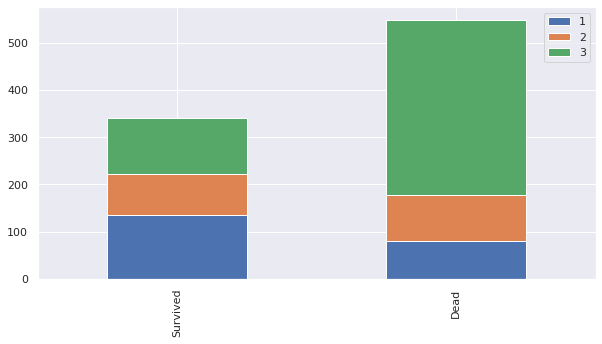

In [18]:
bar_chart('Pclass')

The histogram above shows that the:
**1st Class** survived more likely than **other classes**
**3rd Class** were dead more likely than **other classes**

**Siblings / Spouse Survival**

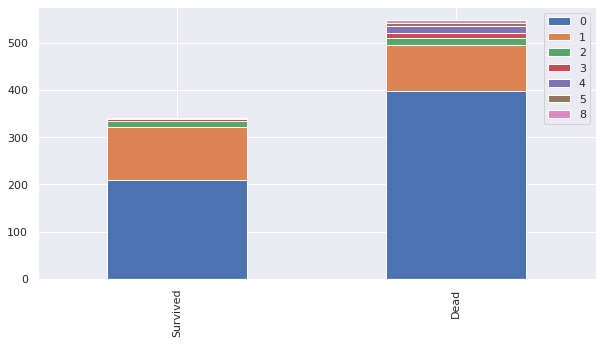

In [19]:
bar_chart('SibSp')

The histogram above shows that:

A passenger with **no Siblings/Spouse** was more likely dead **than others**.

**Parent / Children Survival**

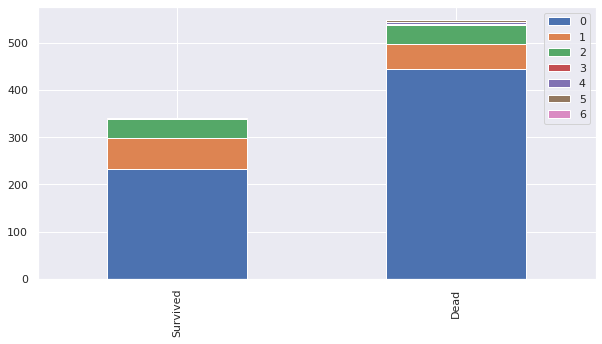

In [20]:
bar_chart('Parch')

**Title (Mr, Mrs, Miss etc) Based Survival**

In [21]:
df_new = [df]
for dataset in df_new:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

We can now see that a new Column appeared in our dataset with a name Title. This contains the Title of each passenger(s) in it. The next step is that we convert it into a numeric value so that we can see Title based survival of the passenger(s).

Lets see what titles we have and how many of them are now in our dataset

In [23]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [24]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  
0      0         A/5 21171   7.2500   NaN        S    Mr  
1      0          PC 17599  71.2833   C85        C   Mrs  
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3      0            113803  53.1000  C123        S   Mrs  
4      0            373450   8.0500   NaN        S    Mr

In [25]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

### Cleaning the Dataset

**a) Extracting the Name Titles (Mr, Mrs etc) from the Name feature field**

**It is also a part of Data-Cleaning**

The convention we will be using to map the Titles will be:
- Mr = 0
- Miss = 1
- Mrs = 2
- Others = 3

In [26]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in df_new:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [27]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      0  
1      0          PC 17599  71.2833   C85        C      2  
2      0  STON/O2. 3101282   7.9250   NaN        S      1  
3      0            113803  53.1000  C123        S      2  
4      0            373450   8.0500   NaN        S      0

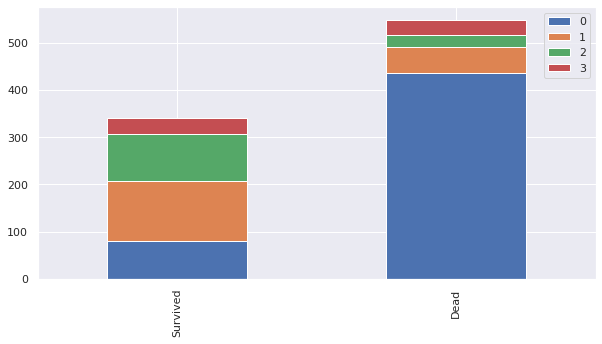

In [28]:
bar_chart('Title')

As we saw previously and as of now the title # 0 (Mr) have a large dead count as compared to the other and we already saw this that the dead count for the males were more as compared to the females.

Now we have done enough of the data exploration, I leave the rest for you.
Lets move on to the actual data cleaning process we were here for. 

**b) Changing the Gender (Sex) to numeric values**

We see in our dataset that the values for the **Sex** feature is either **male** or **female** but the computer machine doesn't understand these terms, so we need to convert them into numerical value. We will use the following conventions:
- Male = 1
- Female = 0

In [29]:
df.Sex.replace(['male', 'female'], ['1', '0'], inplace=True)


In [30]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   0  38.0      1      0   
2                             Heikkinen, Miss. Laina   0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  35.0      1      0   
4                           Allen, Mr. William Henry   1  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

We see that the values for **male** and **female** are replaced by **1** and **0** respectively.

Looking for the missing Information is the next task for us in the box.

**c) Filling the missing information in dataset**

#### What is the missing Information? 
Before we fill in the missing information, we must first know what information is missing from our dataset? So, lets first see the information missing from our dataset.

In [31]:
df.shape

(891, 13)

We already saw that there are 891 data rows in our column (previously there were 12 columns), now there are 13 because we added a column for Title. 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


The shape give us a total of 891 rows, but we see in the above info that there are **714 non-null count for age**, **204 non-null values for Cabin**, and **889 non-null values for Embarked**. There should be a total value count of **891** as that of others, this shows some data is missing. let's have a clear picture of it.

**Checking for the null values**

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

We see that there are missing (null) values for three features. Next we must know whether the data for respective feature which is not available is important for us or not? But that depends on what type ! From a quick view we can say that the age feature is of more importance for us rather than the Cabin and Embarked feature. Because the age value is directly linked to the passenger(s) identity.

**Approach for filling in the missing age**

We will fill in the missing values with respect to the **Title** we made, like to fill in the age(s) of males we will take the **mean** of the male Titles, similarly same goes for the females.

In [34]:
missing_ages = df[df['Age'].isnull()]

In [35]:
missing_ages

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

    Sex  Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Title  
5     1  NaN      0      0      330877   8.4583   NaN        Q      0  
17    1  NaN      0      0      244373  13.0000   NaN        S      0  
19    0  NaN      0      0        2649   7.2250   NaN        C      2  
26    1  NaN      0      0        2631   7.2250   NaN        C      0  
28    0  NaN      0      0      330959   7.8792   NaN        Q      1  
..   ..  ...    ...    ...         ...      ...   ...      ...    ...  
859   1  NaN      0      0        2629   7.2292   NaN        C      0  
863   0  NaN      8      2    CA. 2343  69.5500   NaN        S      1  
868   1  NaN      0      0      345777   9.5000   NaN        S      0  
878   1  NaN      0      0      349217   7.8958   NaN        S      0  
888   0  NaN      1      2  W./C. 6607  23.4500   NaN        S      1  

[177 rows x 13 columns]

Calculating the mean ages grouped by the Gender and the PClass.

In [36]:
mean_ages = df.groupby(['Sex','Pclass'])['Age'].mean()

In [37]:
mean_ages

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [38]:
#making a function to fill the NaN age(s) cells
def fill_nan_ages(row):
    '''
    This function checks for if the age is null and replaces
    it with the mean value from the mean_ages variable.
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']
    

In [39]:
df['Age'] = df.apply(fill_nan_ages, axis=1)

Now we have filled in the NaN ages that were missing from the dataset. Lets look at the updated missing values for our dataset.

In [40]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

So we see that the Age column now have no missing values. As Cabin and Embarked feature will not be used for model training so we can ignore it.

**d) Seperating/Categorizing the uncategorized data in the dataset**

The age of different people has various values, we need to categorize them in terms of their class. This classification is known as categorizing the dataset. Also Known as **binning**.
#### Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child:   0  
young:   1  
adult:   2  
mid-age: 3  
senior:  4

In [41]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris   1  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   0  38.00      1   
2                               Heikkinen, Miss. Laina   0  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  35.00      1   
4                             Allen, Mr. William Henry   1  35.00      0   
..                                                 ...  ..    ...    ...   
886                              Montvila, Rev. Juozas   1  27.00      0   
887                       Graham, Miss. Margaret Edith   0  19.00      0   
888           Johnston, Miss. Catherine Helen "Carrie"   0  21.75      1   
889                              Behr, Mr. Karl Howell   1  26.00      0   
890                                Dooley, Mr. Patrick   1  32.00      0   

     Parch            Ticket     Fare Cabin Embarked  Title  
0        0         A/5 21171   7.2500   NaN        S      0  
1        0          PC 17599  71.2833   C85        C      2  
2        0  STON/O2. 3101282   7.9250   NaN        S      1  
3        0            113803  53.1000  C123        S      2  
4        0            373450   8.0500   NaN        S      0  
..     ...               ...      ...   ...      ...    ...  
886      0            211536  13.0000   NaN        S      3  
887      0            112053  30.0000   B42        S      1  
888      2        W./C. 6607  23.4500   NaN        S      1  
889      0            111369  30.0000  C148        C      0  
890      0            370376   7.7500   NaN        Q      0  

[891 rows x 13 columns]

In [42]:
for dataset in df_new:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [43]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name Sex  Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris   1  1.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   0  3.0      1      0   
2                               Heikkinen, Miss. Laina   0  1.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  2.0      1      0   
4                             Allen, Mr. William Henry   1  2.0      0      0   
..                                                 ...  ..  ...    ...    ...   
886                              Montvila, Rev. Juozas   1  2.0      0      0   
887                       Graham, Miss. Margaret Edith   0  1.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"   0  1.0      1      2   
889                              Behr, Mr. Karl Howell   1  1.0      0      0   
890                                Dooley, Mr. Patrick   1  2.0      0      0   

               Ticket     Fare Cabin Embarked  Title  
0           A/5 21171   7.2500   NaN        S      0  
1            PC 17599  71.2833   C85        C      2  
2    STON/O2. 3101282   7.9250   NaN        S      1  
3              113803  53.1000  C123        S      2  
4              373450   8.0500   NaN        S      0  
..                ...      ...   ...      ...    ...  
886            211536  13.0000   NaN        S      3  
887            112053  30.0000   B42        S      1  
888        W./C. 6607  23.4500   NaN        S      1  
889            111369  30.0000  C148        C      0  
890            370376   7.7500   NaN        Q      0  

[891 rows x 13 columns]

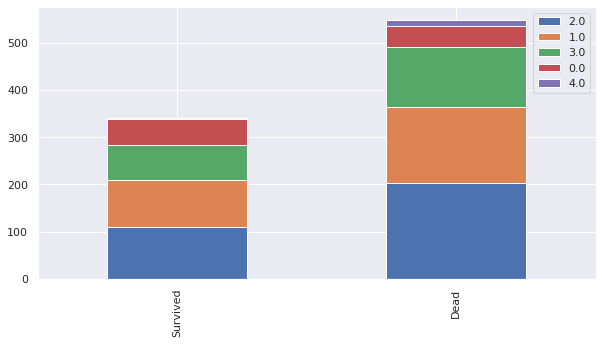

In [44]:
bar_chart('Age')

### Dropping Unwanted Columns


In [45]:
columns_toDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

df = df.drop(columns = columns_toDrop)

In [46]:
df

Survived  Pclass Sex  Age  SibSp  Parch     Fare  Title
0           0       3   1  1.0      1      0   7.2500      0
1           1       1   0  3.0      1      0  71.2833      2
2           1       3   0  1.0      0      0   7.9250      1
3           1       1   0  2.0      1      0  53.1000      2
4           0       3   1  2.0      0      0   8.0500      0
..        ...     ...  ..  ...    ...    ...      ...    ...
886         0       2   1  2.0      0      0  13.0000      3
887         1       1   0  1.0      0      0  30.0000      1
888         0       3   0  1.0      1      2  23.4500      1
889         1       1   1  1.0      0      0  30.0000      0
890         0       3   1  2.0      0      0   7.7500      0

[891 rows x 8 columns]

This is our final dataset with which we are now ready to move towards the model training process. 

## Splitting the Data Frame into Train and Test data

In [47]:
# Spliting target variable and independent variables
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [48]:
X #This is our training data features for the model

Pclass Sex  Age  SibSp  Parch     Fare  Title
0         3   1  1.0      1      0   7.2500      0
1         1   0  3.0      1      0  71.2833      2
2         3   0  1.0      0      0   7.9250      1
3         1   0  2.0      1      0  53.1000      2
4         3   1  2.0      0      0   8.0500      0
..      ...  ..  ...    ...    ...      ...    ...
886       2   1  2.0      0      0  13.0000      3
887       1   0  1.0      0      0  30.0000      1
888       3   0  1.0      1      2  23.4500      1
889       1   1  1.0      0      0  30.0000      0
890       3   1  2.0      0      0   7.7500      0

[891 rows x 7 columns]

In [49]:
y #This is our expected output for each case.

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (891, 7)
Shape of Independent Variable y = (891,)


In [51]:
X = X.values
y = y.values

Converting the datatype to float32 type for **sagemaker** processing

In [52]:
X = X.astype('float32')
y = y.astype('float32')

Splitting the dataset into 70% training and 30% test.

In [53]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [54]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (623, 7)
Shape of X_test = (268, 7)
Shape of y_train = (623,)
Shape of y_test = (268,)


## Train, Deploy and Predict

### Bringing in SageMaker

Importing sagemaker necessary libraries.

In [55]:
import boto3
import sagemaker
from sagemaker import get_execution_role

# sagemaker session, role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

## Linear Learner 
Linear learner is a supervised learning algorithm that is used to fit a line to the training data.

It can be used for both regression and classification:

- Regression: output contains numeric continuos values

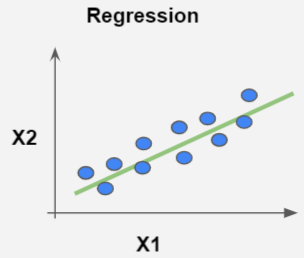

- Classification:
  
  Binary Classification: Output label must be either 0 or 1.
  
  Multiclass classification: output label must be from 0 to num_classes-1.

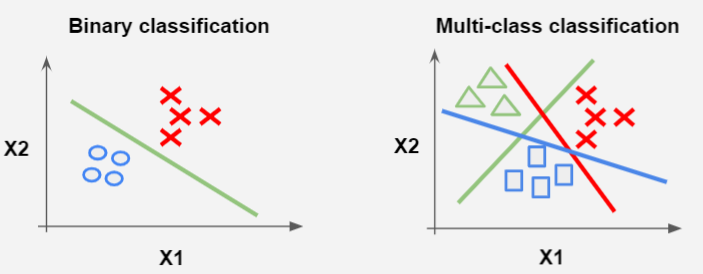



In [74]:
# import LinearLearner
from sagemaker import LinearLearner

# specify an output path
bucket = 'titanic-aws-sagemaker-project'
prefix = 'sm-out'
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate LinearLearner
linear = LinearLearner(role=role,
                       instance_count=1, 
                       instance_type='ml.m4.xlarge',
                       predictor_type='binary_classifier',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=300,
                       num_models = 32,
                       loss = 'logistic',
                       use_spot_instances = True,
                       max_run=300,
                       max_wait=600,
                      )

## 5. Training the Model

In [75]:
formatted_train_data = linear.record_set(X_train, labels=y_train)

In [76]:
formatted_validation_data = linear.record_set(X_test, labels=y_test, channel='validation')

In [77]:
linear.fit([formatted_train_data,formatted_validation_data])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-09-26 01:52:05 Starting - Starting the training job...
2022-09-26 01:52:30 Starting - Preparing the instances for trainingProfilerReport-1664157125: InProgress
......
2022-09-26 01:53:31 Downloading - Downloading input data...
2022-09-26 01:53:51 Training - Downloading the training image............
2022-09-26 01:56:02 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/26/2022 01:56:05 INFO 140646589900608] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_

## 6. Deploying the Model

In [78]:
linear_binclass = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


--------------!

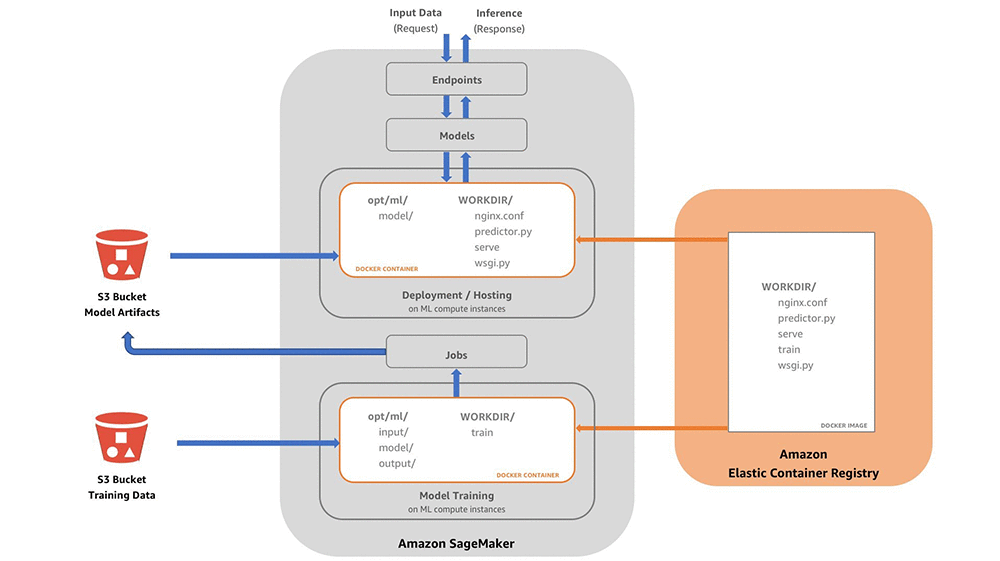

In [79]:
from sagemaker.predictor import csv_serializer, json_deserializer


linear_binclass.ContentType='text/csv'
linear_binclass.serializer = csv_serializer
linear_binclass.deserializer = json_deserializer

## 7. Performing Survival Prediction 

In [80]:
# making prediction on the test data
result = linear_binclass.predict(X_test)
result

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 0.16462825238704681, 'predicted_label': 0},
  {'score': 0.166354238986969, 'predicted_label': 0},
  {'score': 0.6260609030723572, 'predicted_label': 1},
  {'score': 0.8654685020446777, 'predicted_label': 1},
  {'score': 0.32845115661621094, 'predicted_label': 0},
  {'score': 0.3015846610069275, 'predicted_label': 0},
  {'score': 0.8534693717956543, 'predicted_label': 1},
  {'score': 0.5374816656112671, 'predicted_label': 0},
  {'score': 0.3081137537956238, 'predicted_label': 0},
  {'score': 0.14852368831634521, 'predicted_label': 0},
  {'score': 0.11088760197162628, 'predicted_label': 0},
  {'score': 0.22221361100673676, 'predicted_label': 0},
  {'score': 0.7563371658325195, 'predicted_label': 1},
  {'score': 0.07987093925476074, 'predicted_label': 0},
  {'score': 0.8359071016311646, 'predicted_label': 1},
  {'score': 0.42864367365837097, 'predicted_label': 0},
  {'score': 0.11071397364139557, 'predicted_label': 0},
  {'score': 0.30954617261886597, 'predicted

In [81]:
#access the scores by iterating through the scores in predictions
predictions = np.array([r['score'] for r in result['predictions']])
predictions

array([0.16462825, 0.16635424, 0.6260609 , 0.8654685 , 0.32845116,
       0.30158466, 0.85346937, 0.53748167, 0.30811375, 0.14852369,
       0.1108876 , 0.22221361, 0.75633717, 0.07987094, 0.8359071 ,
       0.42864367, 0.11071397, 0.30954617, 0.23781602, 0.78637719,
       0.14852369, 0.11037003, 0.11036736, 0.11079019, 0.70481902,
       0.54192543, 0.84935516, 0.90882713, 0.11079019, 0.16476423,
       0.16449247, 0.11502921, 0.39139098, 0.11079019, 0.11013684,
       0.29487827, 0.1105379 , 0.35527679, 0.2024525 , 0.32845116,
       0.73171026, 0.25051373, 0.80119067, 0.15937163, 0.03327876,
       0.2024525 , 0.16396469, 0.62612957, 0.06494328, 0.11079019,
       0.1648598 , 0.23069289, 0.80959028, 0.12188512, 0.1112752 ,
       0.62586701, 0.30381176, 0.10965348, 0.16105011, 0.88711423,
       0.21623902, 0.10590223, 0.1660471 , 0.21353593, 0.11042247,
       0.6260609 , 0.76598269, 0.54017478, 0.16498482, 0.07295649,
       0.39893982, 0.06468239, 0.21353593, 0.21623902, 0.32075

In [82]:
#compare actual output values with predicted values
ddf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
ddf

Actual  Predicted
0       0.0   0.164628
1       0.0   0.166354
2       1.0   0.626061
3       1.0   0.865469
4       0.0   0.328451
..      ...        ...
263     1.0   0.110790
264     1.0   0.662442
265     1.0   0.872912
266     0.0   0.303812
267     0.0   0.301782

[268 rows x 2 columns]

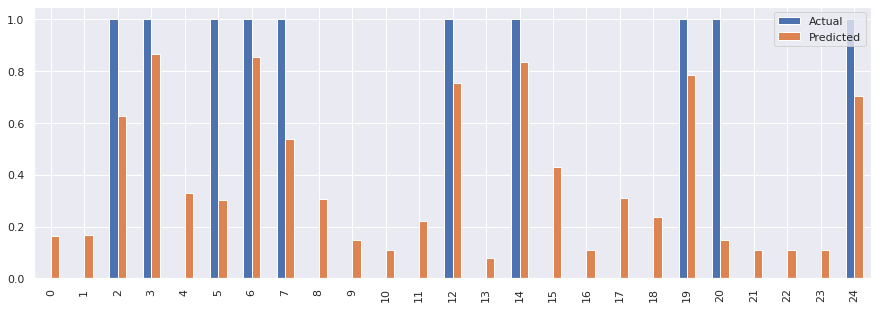

In [83]:
# visualize comparison result as a bar graph
df1 = ddf.head(25)
df1.plot(kind='bar',figsize=(15,5))
plt.show()

## 8. Deleting Endpoints

In [84]:
# Delete the end-point
linear_binclass.delete_endpoint()